# Categorical analysis - discovery
Run differents codes to discover differents kinds of plots to do

In [1]:
import os
# fix root path to save outputs
actual_path = os.path.abspath(os.getcwd())
list_root_path = actual_path.split('\\')[:-1]
root_path = '\\'.join(list_root_path)
os.chdir(root_path)
print('root path: ', root_path)

root path:  D:\github-mi-repo\exploratory-data-analysis


### 0. Package and load data

In [2]:
from sklearn.datasets import fetch_california_housing
import json
import pandas as pd
import numpy as np
import seaborn as sns

# plotly
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

In [3]:
### AUXILIAR FUNCTION
def plot_heatmap(df_corr):
    """
    Plot heatmap using the input dataframe

    Args
        df_corr (dataframe): dataframe with correlations to plot

    Return
        fig (figure plotly): fig of plotly with the plot generated
    """
    
    # heatmap
    fig = px.imshow(df_corr, text_auto=True, aspect="auto")
    
    # change title
    fig.update_layout(
      title_text = "Heatmap cross table",
        title_x = 0.5,
    title_font = dict(size = 28)
      )
    
    return fig

#### load data categorical features and target generated by percentiles
This is generated in the notebook 0

In [4]:
data_percentile_feature_target = pd.read_pickle('data/df_cat_feature_target.pkl')
data_percentile_feature_target.head()

,quartile_MedInc,quartile_HouseAge,quartile_AveRooms,quartile_AveBedrms,quartile_Population,quartile_AveOccup,quartile_Latitude,quartile_Longitude,quartile_Price
0,q4 - (4.74-15.0),q4 - (37.0-52.0),q4 - (6.05-141.91),q2 - (1.01-1.05),q1 - (3.0-787.0),q2 - (2.43-2.82),q4 - (37.71-41.95),q1 - (-124.35--121.8),q4 - (2.65-5.0)
1,q4 - (4.74-15.0),q2 - (18.0-29.0),q4 - (6.05-141.91),q1 - (0.33-1.01),q4 - (1725.0-35682.0),q1 - (0.69-2.43),q4 - (37.71-41.95),q1 - (-124.35--121.8),q4 - (2.65-5.0)
2,q4 - (4.74-15.0),q4 - (37.0-52.0),q4 - (6.05-141.91),q3 - (1.05-1.1),q1 - (3.0-787.0),q2 - (2.43-2.82),q4 - (37.71-41.95),q1 - (-124.35--121.8),q4 - (2.65-5.0)
3,q4 - (4.74-15.0),q4 - (37.0-52.0),q3 - (5.23-6.05),q3 - (1.05-1.1),q1 - (3.0-787.0),q2 - (2.43-2.82),q4 - (37.71-41.95),q1 - (-124.35--121.8),q4 - (2.65-5.0)
4,q3 - (3.53-4.74),q4 - (37.0-52.0),q4 - (6.05-141.91),q3 - (1.05-1.1),q1 - (3.0-787.0),q1 - (0.69-2.43),q4 - (37.71-41.95),q1 - (-124.35--121.8),q4 - (2.65-5.0)


#### load data categorical only features generated by percentiles
This is generated in the notebook 0

In [5]:
data_percentile_feature = pd.read_pickle('data/df_cat_feature.pkl')
data_percentile_feature.head()

,Price,quartile_Latitude,quartile_Population,quartile_HouseAge,quartile_Longitude,quartile_AveOccup,quartile_AveRooms,quartile_MedInc,quartile_AveBedrms
0,4.526,q4 - (37.71-41.95),q1 - (3.0-787.0),q4 - (37.0-52.0),q1 - (-124.35--121.8),q2 - (2.43-2.82),q4 - (6.05-141.91),q4 - (4.74-15.0),q2 - (1.01-1.05)
1,3.585,q4 - (37.71-41.95),q4 - (1725.0-35682.0),q2 - (18.0-29.0),q1 - (-124.35--121.8),q1 - (0.69-2.43),q4 - (6.05-141.91),q4 - (4.74-15.0),q1 - (0.33-1.01)
2,3.521,q4 - (37.71-41.95),q1 - (3.0-787.0),q4 - (37.0-52.0),q1 - (-124.35--121.8),q2 - (2.43-2.82),q4 - (6.05-141.91),q4 - (4.74-15.0),q3 - (1.05-1.1)
3,3.413,q4 - (37.71-41.95),q1 - (3.0-787.0),q4 - (37.0-52.0),q1 - (-124.35--121.8),q2 - (2.43-2.82),q3 - (5.23-6.05),q4 - (4.74-15.0),q3 - (1.05-1.1)
4,3.422,q4 - (37.71-41.95),q1 - (3.0-787.0),q4 - (37.0-52.0),q1 - (-124.35--121.8),q1 - (0.69-2.43),q4 - (6.05-141.91),q3 - (3.53-4.74),q3 - (1.05-1.1)


#### Read original data - continuos values

In [6]:
data_X, data_y = fetch_california_housing(return_X_y=True, as_frame=True)

# joinn and rename dataset
data_continuous = data_X.copy()
data_continuous['Price'] = data_y
data_continuous.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
# define name of feature TARGET
target = ["Price"]
percentile_target = ["quartile"]
name_target = [percentile_target[i]+'_'+target[i] for i in range(len(target))]
name_target

['quartile_Price']

## TABLE 1. Table count freq each group in categorical features
in this example the data is divided in percentile, so this table doesn't aport information). But when the data is divided by not percentile this is a interesting information

In [25]:
def calculate_freq_data(df):
    """
    Given a categorical dataframe, calculate the freq of each category of each variable presents in the dataframe

    Args
        df (dataframe): input dataframe

    Return
        freq_df (dataframe): dataframe with the freq and percent
        freq_df_to_plotly (dataframe): dataframe with the freq and percent adapted to show in a plotly graph
    """
    variables_to_analyze = df.columns.tolist()

    # generate dataframe freq_df
    freq_df = pd.DataFrame()
    for i in variables_to_analyze:
        #obtener valores de cada una de las características
        A = df[i].value_counts()
        #crear base de datos con el total y porcentaje de cada caracteerística
        B = pd.DataFrame({ 'Freq (count)' : A, 'Freq (percent)': A.map(lambda x: x / A.sum())  })
        # crear multiindex
        B.index = pd.MultiIndex.from_product([[i], A.index.tolist()] )
        # unir a una sola base datos
        freq_df = pd.concat([freq_df, B], axis = 0)


    # round to 2 decimals
    freq_df['Freq (percent)'].round(2)

    # transform df freq_df into a format to plotly
    freq_df_to_plotly = freq_df.reset_index()
    freq_df_to_plotly.loc[freq_df_to_plotly['level_0'].duplicated(), 'level_0'] = ''
    
    return freq_df, freq_df_to_plotly

In [26]:
def plot_df_table_plotly(df_to_plotly):
    """
    Given a dataframe, transform into a plotly table
    Args
        df_to_plotly (dataframe): dataframe that will be transformed into plotly table

    Return
        table_fig (figure plotly): fig of plotly with the plot generated
    """
    table_fig = go.Figure(data=[go.Table(
    header=dict(values=list(df_to_plotly.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[df_to_plotly[col] for col in df_to_plotly.columns],
               fill_color='lavender',
               align='left'))
    ])
    return table_fig

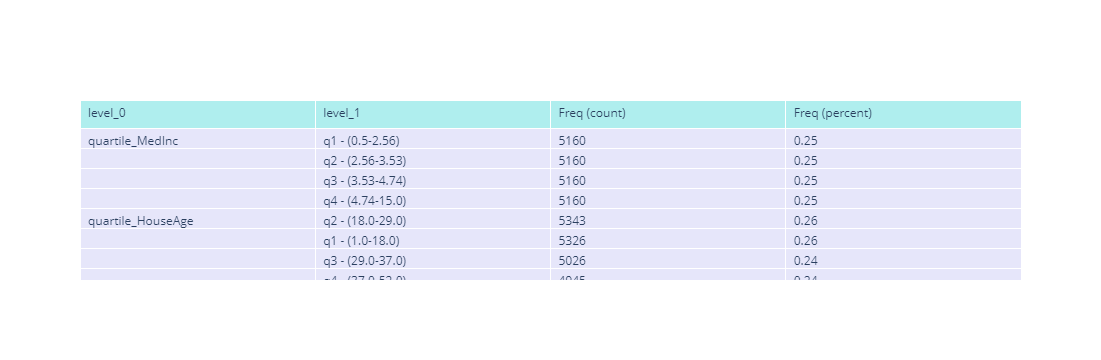

In [27]:
# generate dataframe freq
df_freq_categorical_variables, df_freq_categorical_variables_plotly = calculate_freq_data(data_percentile_feature_target)

# transform into plotly table
fig_table_freq_categorical_variables = plot_df_table_plotly(df_freq_categorical_variables_plotly)

# save as plotly image and a excel table
fig_table_freq_categorical_variables.write_html("output_eda/5_categorical_analysis/table_freq_categorical_variables.html")
df_freq_categorical_variables.to_excel("output_eda/5_categorical_analysis/df_freq_categorical_variables.xlsx")

fig_table_freq_categorical_variables.show()

In [28]:
df_freq_categorical_variables

Freq (count)  Freq (percent)
quartile_MedInc     q1 - (0.5-2.56)                 5160            0.25
                    q2 - (2.56-3.53)                5160            0.25
                    q3 - (3.53-4.74)                5160            0.25
                    q4 - (4.74-15.0)                5160            0.25
quartile_HouseAge   q2 - (18.0-29.0)                5343            0.26
                    q1 - (1.0-18.0)                 5326            0.26
                    q3 - (29.0-37.0)                5026            0.24
                    q4 - (37.0-52.0)                4945            0.24
quartile_AveRooms   q3 - (5.23-6.05)                5161            0.25
                    q1 - (0.85-4.44)                5160            0.25
                    q2 - (4.44-5.23)                5160            0.25
                    q4 - (6.05-141.91)              5159            0.25
quartile_AveBedrms  q2 - (1.01-1.05)                5170            0.25
                    q1 - (0.33-1.01)                5160            0.25
                    q4 - (1.1-34.07)                5159            0.25
                    q3 - (1.05-1.1)                 5151            0.25
quartile_Population q1 - (3.0-787.0)                5164            0.25
                    q2 - (787.0-1166.0)             5161            0.25
                    q3 - (1166.0-1725.0)            5159            0.25
                    q4 - (1725.0-35682.0)           5156            0.25
quartile_AveOccup   q1 - (0.69-2.43)                5160            0.25
                    q2 - (2.43-2.82)                5160            0.25
                    q3 - (2.82-3.28)                5160            0.25
                    q4 - (3.28-1243.33)             5160            0.25
quartile_Latitude   q2 - (33.93-34.26)              5197            0.25
                    q1 - (32.54-33.93)              5192            0.25
                    q4 - (37.71-41.95)              5157            0.25
                    q3 - (34.26-37.71)              5094            0.25
quartile_Longitude  q2 - (-121.8--118.49)           5198            0.25
                    q1 - (-124.35--121.8)           5165            0.25
                    q4 - (-118.01--114.31)          5145            0.25
                    q3 - (-118.49--118.01)          5132            0.25
quartile_Price      q1 - (0.15-1.2)                 5162            0.25
                    q2 - (1.2-1.8)                  5161            0.25
                    q4 - (2.65-5.0)                 5160            0.25
                    q3 - (1.8-2.65)                 5157            0.25

## TABLE 2.Table count freq each group of categorical variables vs target discrete

In [40]:
def calculate_freq_target_each_features(df, target, kind = 'percent'):
    """
    Given a dataframe with discrete features and target discrete. Calculate the freq of the target in each features (each category of each feature)

    Args
        df (dataframe): input dataframe
        target (string): variable target. it needs to be present in the df
        kind (string): way to show the freq of the target. Percent or Value

    Return
        resume (dataframe): dataframe resume with the freq of each category of target in each feature
        resume_to_plotly (dataframe): the same output dataframe but with transformations to show into a plotly table
    """
    # get list of features
    list_features_target = df.columns.tolist() # calculate all variables in dataframe features+target
    list_features = list(set(list_features_target) - set([target]))

    # define kind to aggregation - count/percent
    if kind == 'count':
        aux = np.array(df[target].value_counts().tolist()).reshape(1,len(df[target].value_counts().unique()))
        resume = pd.DataFrame(aux , columns = df[target].value_counts().index.tolist())
        resume.index =  pd.MultiIndex.from_product([ [target]  , ['Mean'] ] )
    
    if kind == 'percent':
        aux = np.array(df[target].value_counts().tolist()).reshape(1,len(df[target].value_counts().unique()))
        resume = pd.DataFrame(aux / aux.sum() , columns = df[target].value_counts().index.tolist())
        resume.index =  pd.MultiIndex.from_product([ [target]  , ['Mean'] ] )

    # create cross table
    for var in list_features:
        if kind == 'count':
            data_aux = pd.crosstab(df[var], df[target])
            data_aux.index = pd.MultiIndex.from_product([ [var]  , df[var].unique().tolist() ] )
            resume = pd.concat((resume,data_aux) , axis = 0, sort = False)
        if kind == 'percent':
            data_aux = pd.crosstab(df[var], df[target])
            data_aux = data_aux.div(data_aux.sum(1).astype(float), axis = 0)
            data_aux.index = pd.MultiIndex.from_product([ [var]  , df[var].unique().tolist() ] )
            resume = pd.concat((resume,data_aux) , axis = 0, sort = False)


    # transform output into 2 decimals
    resume = resume.round(2)
    
    # transfrom table into a format to show in plotly
    resume_to_plotly = resume.reset_index()
    resume_to_plotly.loc[resume_to_plotly['level_0'].duplicated(), 'level_0'] = ''
    
    return resume, resume_to_plotly

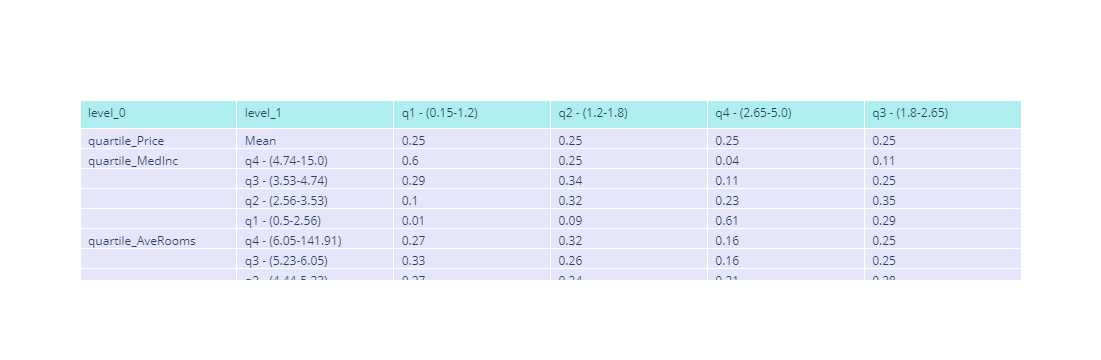

In [41]:
# generate dataframe freq target each feature
df_freq_target_each_feature, df_freq_target_each_feature_plotly = calculate_freq_target_each_features(df = data_percentile_feature_target, 
                                                                                                      target = name_target[0], # pass string 
                                                                                                      kind = 'percent'
                                                                                                     )
# transform into plotly table
fig_freq_target_each_feature = plot_df_table_plotly(df_freq_target_each_feature_plotly)

# save as plotly image and a excel table
fig_freq_target_each_feature.write_html("output_eda/5_categorical_analysis/freq_target_each_feature.html")
df_freq_target_each_feature.to_excel("output_eda/5_categorical_analysis/freq_target_each_feature.xlsx")

fig_freq_target_each_feature.show()

In [42]:
df_freq_target_each_feature

q1 - (0.15-1.2)  q2 - (1.2-1.8)  \
quartile_Price      Mean                               0.25            0.25   
quartile_MedInc     q4 - (4.74-15.0)                   0.60            0.25   
                    q3 - (3.53-4.74)                   0.29            0.34   
                    q2 - (2.56-3.53)                   0.10            0.32   
                    q1 - (0.5-2.56)                    0.01            0.09   
quartile_AveRooms   q4 - (6.05-141.91)                 0.27            0.32   
                    q3 - (5.23-6.05)                   0.33            0.26   
                    q2 - (4.44-5.23)                   0.27            0.24   
                    q1 - (0.85-4.44)                   0.13            0.17   
quartile_AveBedrms  q2 - (1.01-1.05)                   0.21            0.25   
                    q1 - (0.33-1.01)                   0.19            0.26   
                    q3 - (1.05-1.1)                    0.24            0.25   
                    q4 - (1.1-34.07)                   0.36            0.24   
quartile_Population q1 - (3.0-787.0)                   0.29            0.21   
                    q4 - (1725.0-35682.0)              0.26            0.22   
                    q2 - (787.0-1166.0)                0.25            0.26   
                    q3 - (1166.0-1725.0)               0.20            0.31   
quartile_HouseAge   q4 - (37.0-52.0)                   0.25            0.30   
                    q2 - (18.0-29.0)                   0.26            0.22   
                    q1 - (1.0-18.0)                    0.24            0.26   
                    q3 - (29.0-37.0)                   0.25            0.22   
quartile_Latitude   q4 - (37.71-41.95)                 0.15            0.28   
                    q3 - (34.26-37.71)                 0.16            0.29   
                    q1 - (32.54-33.93)                 0.32            0.16   
                    q2 - (33.93-34.26)                 0.37            0.26   
quartile_Longitude  q1 - (-124.35--121.8)              0.17            0.17   
                    q2 - (-121.8--118.49)              0.48            0.23   
                    q4 - (-118.01--114.31)             0.11            0.29   
                    q3 - (-118.49--118.01)             0.24            0.32   
quartile_AveOccup   q2 - (2.43-2.82)                   0.19            0.19   
                    q1 - (0.69-2.43)                   0.24            0.20   
                    q3 - (2.82-3.28)                   0.25            0.23   
                    q4 - (3.28-1243.33)                0.32            0.38   

                                            q4 - (2.65-5.0)  q3 - (1.8-2.65)  
quartile_Price      Mean                               0.25             0.25  
quartile_MedInc     q4 - (4.74-15.0)                   0.04             0.11  
                    q3 - (3.53-4.74)                   0.11             0.25  
                    q2 - (2.56-3.53)                   0.23             0.35  
                    q1 - (0.5-2.56)                    0.61             0.29  
quartile_AveRooms   q4 - (6.05-141.91)                 0.16             0.25  
                    q3 - (5.23-6.05)                   0.16             0.25  
                    q2 - (4.44-5.23)                   0.21             0.28  
                    q1 - (0.85-4.44)                   0.48             0.23  
quartile_AveBedrms  q2 - (1.01-1.05)                   0.27             0.27  
                    q1 - (0.33-1.01)                   0.27             0.28  
                    q3 - (1.05-1.1)                    0.26             0.25  
                    q4 - (1.1-34.07)                   0.20             0.20  
quartile_Population q1 - (3.0-787.0)                   0.28             0.22  
                    q4 - (1725.0-35682.0)              0.27             0.25  
                    q2 - (787.0-1166.0)                0.24             0.25  
              

### 3. TABLE 3. Behavior target (continuos) vs pair of features (discrete). Aggregation of target vs discrete features

In [49]:
### all args pd.crosstab ---> 
# pd.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)

#### example multiple aggregation

In [52]:
# Crear una tabla cruzada y aplicar funciones de agregación. y multiples columnas
feature_indedx_crosstab = 'quartile_MedInc'
feature_column1_crosstab = 'quartile_HouseAge'
feature_column2_crosstab = 'quartile_Population'

cross_tab = pd.crosstab(index = data_percentile_feature[feature_indedx_crosstab], 
                        columns = [data_percentile_feature[feature_column1_crosstab], data_percentile_feature[feature_column2_crosstab]]
                       )
result = cross_tab.agg(['mean', 'std'])
result

quartile_HouseAge    q1 - (1.0-18.0)                                           \
quartile_Population q1 - (3.0-787.0) q2 - (787.0-1166.0) q3 - (1166.0-1725.0)   
mean                      263.000000          237.000000           313.750000   
std                        44.339599           68.881541            93.585522   

quartile_HouseAge                         q2 - (18.0-29.0)  \
quartile_Population q4 - (1725.0-35682.0) q1 - (3.0-787.0)   
mean                           517.750000        270.00000   
std                            167.448251         64.63745   

quartile_HouseAge                                             \
quartile_Population q2 - (787.0-1166.0) q3 - (1166.0-1725.0)   
mean                         282.500000            365.25000   
std                           33.391616             34.71191   

quartile_HouseAge                         q3 - (29.0-37.0)  \
quartile_Population q4 - (1725.0-35682.0) q1 - (3.0-787.0)   
mean                           418.000000       318.000000   
std                             55.148285        46.332134   

quartile_HouseAge                                             \
quartile_Population q2 - (787.0-1166.0) q3 - (1166.0-1725.0)   
mean                         369.500000           334.250000   
std                           69.019321            51.493527   

quartile_HouseAge                         q4 - (37.0-52.0)  \
quartile_Population q4 - (1725.0-35682.0) q1 - (3.0-787.0)   
mean                           234.750000       440.000000   
std                             86.838452        68.122439   

quartile_HouseAge                                             \
quartile_Population q2 - (787.0-1166.0) q3 - (1166.0-1725.0)   
mean                         401.250000            276.50000   
std                           68.902709            120.47268   

quartile_HouseAge                          
quartile_Population q4 - (1725.0-35682.0)  
mean                            118.50000  
std                             106.29989

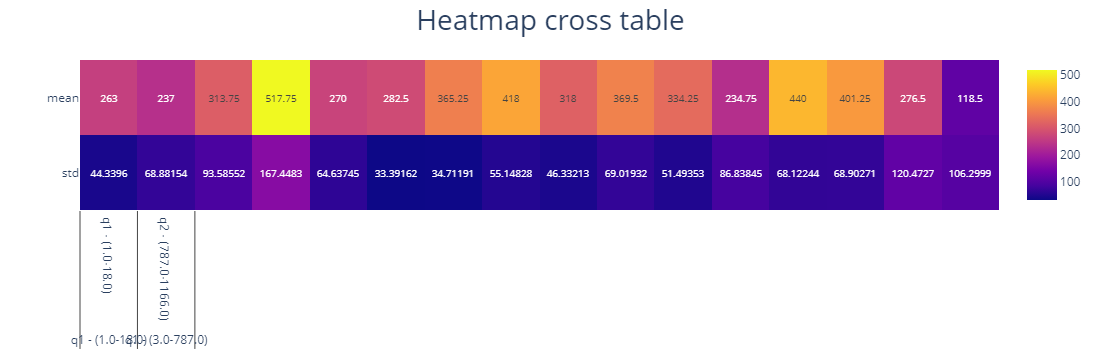

In [53]:
plot_heatmap(result)

In [54]:
# cross tab feature_x & feature_y with values target
# I want to know the behavior of the target (continuos) between 2 differents features categorical

feature_index_ct = 'quartile_MedInc'
feature_column_ct = 'quartile_HouseAge'
feature_values_ct = 'Price'  # target is a continous variable

ct_mean = pd.crosstab(index = data_percentile_feature[feature_index_ct], 
                      columns = data_percentile_feature[feature_column_ct], 
                      values = data_percentile_feature[feature_values_ct], aggfunc='mean')

ct_mean

quartile_HouseAge,q1 - (1.0-18.0),q2 - (18.0-29.0),q3 - (29.0-37.0),q4 - (37.0-52.0)
quartile_MedInc,,,,
q1 - (0.5-2.56),1.159299,1.222798,1.217215,1.287692
q2 - (2.56-3.53),1.470188,1.693193,1.655947,2.019349
q3 - (3.53-4.74),1.796835,2.144851,2.138437,2.646894
q4 - (4.74-15.0),2.781631,3.123192,3.311238,3.853793


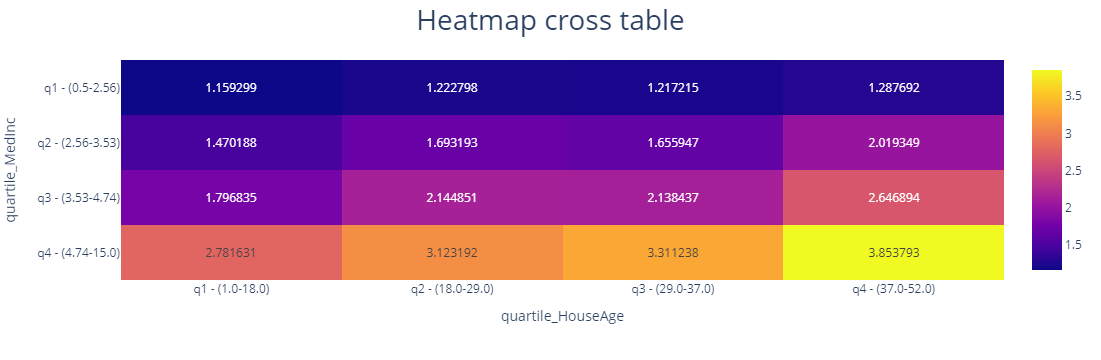

In [55]:
plot_heatmap(ct_mean)

In [56]:
### CROSS TAB 1 INDEX,  2 COLUMNS, VALUES TARGET


feature_index_ct = 'quartile_MedInc'
feature_column1_ct = 'quartile_HouseAge'
feature_column2_ct = 'quartile_Population'
feature_values_ct = 'Price'  # target is a continous variable

ct_mean_2columns = pd.crosstab(index = data_percentile_feature[feature_index_ct], 
                      columns = [data_percentile_feature[feature_column1_ct], data_percentile_feature[feature_column2_ct]], 
                      values = data_percentile_feature[feature_values_ct], aggfunc='mean')

ct_mean_2columns

quartile_HouseAge    q1 - (1.0-18.0)                                           \
quartile_Population q1 - (3.0-787.0) q2 - (787.0-1166.0) q3 - (1166.0-1725.0)   
quartile_MedInc                                                                 
q1 - (0.5-2.56)             1.189762            1.122564             1.098665   
q2 - (2.56-3.53)            1.489052            1.415732             1.467077   
q3 - (3.53-4.74)            1.867447            1.831268             1.757865   
q4 - (4.74-15.0)            2.829580            2.746523             2.782420   

quartile_HouseAge                         q2 - (18.0-29.0)  \
quartile_Population q4 - (1725.0-35682.0) q1 - (3.0-787.0)   
quartile_MedInc                                              
q1 - (0.5-2.56)                  1.196259         1.246029   
q2 - (2.56-3.53)                 1.484054         1.577993   
q3 - (3.53-4.74)                 1.775075         2.071476   
q4 - (4.74-15.0)                 2.776304         3.206943   

quartile_HouseAge                                             \
quartile_Population q2 - (787.0-1166.0) q3 - (1166.0-1725.0)   
quartile_MedInc                                                
q1 - (0.5-2.56)                1.106594             1.111985   
q2 - (2.56-3.53)               1.591100             1.714143   
q3 - (3.53-4.74)               2.171224             2.161982   
q4 - (4.74-15.0)               3.085914             3.077188   

quartile_HouseAge                         q3 - (29.0-37.0)  \
quartile_Population q4 - (1725.0-35682.0) q1 - (3.0-787.0)   
quartile_MedInc                                              
q1 - (0.5-2.56)                  1.396615         1.194604   
q2 - (2.56-3.53)                 1.793911         1.671457   
q3 - (3.53-4.74)                 2.147326         2.101811   
q4 - (4.74-15.0)                 3.142832         3.393991   

quartile_HouseAge                                             \
quartile_Population q2 - (787.0-1166.0) q3 - (1166.0-1725.0)   
quartile_MedInc                                                
q1 - (0.5-2.56)                1.102555             1.172354   
q2 - (2.56-3.53)               1.566571             1.661312   
q3 - (3.53-4.74)               2.213823             2.114771   
q4 - (4.74-15.0)               3.228788             3.269843   

quartile_HouseAge                         q4 - (37.0-52.0)  \
quartile_Population q4 - (1725.0-35682.0) q1 - (3.0-787.0)   
quartile_MedInc                                              
q1 - (0.5-2.56)                  1.391548         1.265384   
q2 - (2.56-3.53)                 1.739774         1.980447   
q3 - (3.53-4.74)                 2.086656         2.543139   
q4 - (4.74-15.0)                 3.432638         3.807604   

quartile_HouseAge                                             \
quartile_Population q2 - (787.0-1166.0) q3 - (1166.0-1725.0)   
quartile_MedInc                                                
q1 - (0.5-2.56)                1.226030             1.241717   
q2 - (2.56-3.53)               1.956400             2.106774   
q3 - (3.53-4.74)               2.650451             2.742473   
q4 - (4.74-15.0)               3.938839             3.828398   

quartile_HouseAge                          
quartile_Population q4 - (1725.0-35682.0)  
quartile_MedInc                            
q1 - (0.5-2.56)                  1.504512  
q2 - (2.56-3.53)                 2.124076  
q3 - (3.53-4.74)                 2.896984  
q4 - (4.74-15.0)                 3.663803

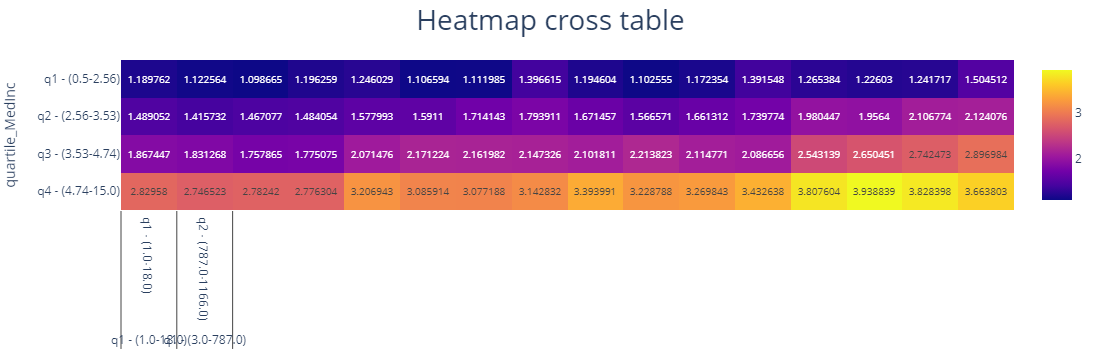

In [57]:
fig_heatmap_crosstab_1_row_2columns_target = plot_heatmap(ct_mean_2columns)

fig_heatmap_crosstab_1_row_2columns_target.show()

fig_heatmap_crosstab_1_row_2columns_target.write_html("output_eda/5_categorical_analysis/heatmap_crosstab_1_row_2columns_target.html")

In [78]:
### CROSS TAB 2 INDEX,  1 COLUMNS, VALUES TARGET


feature_index1_ct = 'quartile_MedInc'
feature_index2_ct = 'quartile_HouseAge'
feature_column_ct = 'quartile_Population'
feature_values_ct = 'Price'  # target is a continous variable

ct_mean_2index = pd.crosstab(index = [data_percentile_feature[feature_index1_ct], data_percentile_feature[feature_index2_ct]], 
                      columns = data_percentile_feature[feature_column_ct], 
                      values = data_percentile_feature[feature_values_ct], aggfunc='mean')

ct_mean_2index

quartile_Population                 q1 - (3.0-787.0)  q2 - (787.0-1166.0)  \
quartile_MedInc  quartile_HouseAge                                          
q1 - (0.5-2.56)  q1 - (1.0-18.0)            1.189762             1.122564   
                 q2 - (18.0-29.0)           1.246029             1.106594   
                 q3 - (29.0-37.0)           1.194604             1.102555   
                 q4 - (37.0-52.0)           1.265384             1.226030   
q2 - (2.56-3.53) q1 - (1.0-18.0)            1.489052             1.415732   
                 q2 - (18.0-29.0)           1.577993             1.591100   
                 q3 - (29.0-37.0)           1.671457             1.566571   
                 q4 - (37.0-52.0)           1.980447             1.956400   
q3 - (3.53-4.74) q1 - (1.0-18.0)            1.867447             1.831268   
                 q2 - (18.0-29.0)           2.071476             2.171224   
                 q3 - (29.0-37.0)           2.101811             2.213823   
                 q4 - (37.0-52.0)           2.543139             2.650451   
q4 - (4.74-15.0) q1 - (1.0-18.0)            2.829580             2.746523   
                 q2 - (18.0-29.0)           3.206943             3.085914   
                 q3 - (29.0-37.0)           3.393991             3.228788   
                 q4 - (37.0-52.0)           3.807604             3.938839   

quartile_Population                 q3 - (1166.0-1725.0)  \
quartile_MedInc  quartile_HouseAge                         
q1 - (0.5-2.56)  q1 - (1.0-18.0)                1.098665   
                 q2 - (18.0-29.0)               1.111985   
                 q3 - (29.0-37.0)               1.172354   
                 q4 - (37.0-52.0)               1.241717   
q2 - (2.56-3.53) q1 - (1.0-18.0)                1.467077   
                 q2 - (18.0-29.0)               1.714143   
                 q3 - (29.0-37.0)               1.661312   
                 q4 - (37.0-52.0)               2.106774   
q3 - (3.53-4.74) q1 - (1.0-18.0)                1.757865   
                 q2 - (18.0-29.0)               2.161982   
                 q3 - (29.0-37.0)               2.114771   
                 q4 - (37.0-52.0)               2.742473   
q4 - (4.74-15.0) q1 - (1.0-18.0)                2.782420   
                 q2 - (18.0-29.0)               3.077188   
                 q3 - (29.0-37.0)               3.269843   
                 q4 - (37.0-52.0)               3.828398   

quartile_Population                 q4 - (1725.0-35682.0)  
quartile_MedInc  quartile_HouseAge                         
q1 - (0.5-2.56)  q1 - (1.0-18.0)                 1.196259  
                 q2 - (18.0-29.0)                1.396615  
                 q3 - (29.0-37.0)                1.391548  
                 q4 - (37.0-52.0)                1.504512  
q2 - (2.56-3.53) q1 - (1.0-18.0)                 1.484054  
                 q2 - (18.0-29.0)                1.793911  
                 q3 - (29.0-37.0)                1.739774  
                 q4 - (37.0-52.0)                2.124076  
q3 - (3.53-4.74) q1 - (1.0-18.0)                 1.775075  
                 q2 - (18.0-29.0)                2.147326  
                 q3 - (29.0-37.0)                2.086656  
                 q4 - (37.0-52.0)                2.896984  
q4 - (4.74-15.0) q1 - (1.0-18.0)                 2.776304  
                 q2 - (18.0-29.0)                3.142832  
                 q3 - (29.0-37.0)                3.432638  
                 q4 - (37.0-52.0)                3.663803

In [79]:
##### transform into plotly heatmap format - only one index
# generate a dataframe with multiindex into only one index (join intro string the multi index into one index)

# 0. reset index
ct_mean_2index_reset_index = ct_mean_2index.reset_index()

# 1. transform each categorical column into string.
ct_mean_2index_reset_index[feature_index1_ct] = ct_mean_2index_reset_index[feature_index1_ct].astype(str)
ct_mean_2index_reset_index[feature_index2_ct] = ct_mean_2index_reset_index[feature_index2_ct].astype(str)

# 2. add name of the column (beacase actually only show q1, q2, etc)
ct_mean_2index_reset_index[feature_index1_ct] = feature_index1_ct + '|' + ct_mean_2index_reset_index[feature_index1_ct]
ct_mean_2index_reset_index[feature_index2_ct] = feature_index2_ct + '|' + ct_mean_2index_reset_index[feature_index2_ct]

# 3. combine content of 2 columnas and delete old ones
ct_mean_2index_reset_index['index'] = ct_mean_2index_reset_index[feature_index1_ct] + '__&&__' + ct_mean_2index_reset_index[feature_index2_ct]
ct_mean_2index_reset_index.drop(columns = [feature_index1_ct, feature_index2_ct], inplace = True)
ct_mean_2index_reset_index.set_index('index', inplace = True)

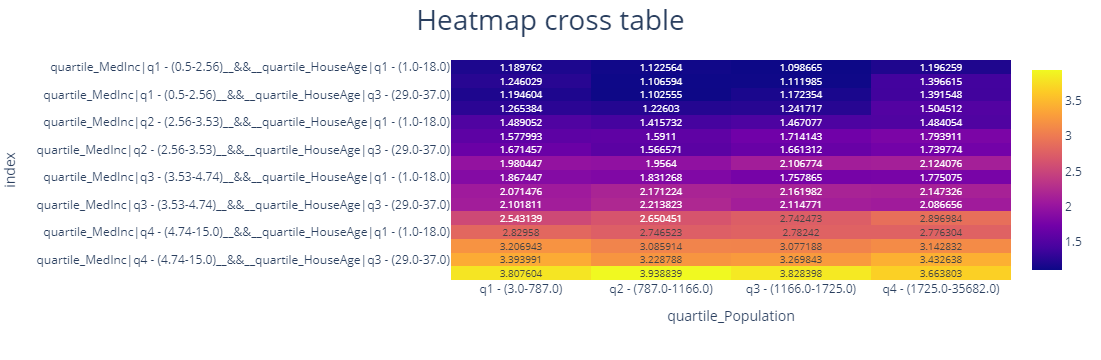

In [80]:
fig_heatmap_crosstab_2_row_1columns_target = plot_heatmap(ct_mean_2index_reset_index)

fig_heatmap_crosstab_2_row_1columns_target.show()

fig_heatmap_crosstab_2_row_1columns_target.write_html("output_eda/5_categorical_analysis/heatmap_crosstab_2_row_1columns_target.html")

#### PLOT CROSS TABLES

In [62]:
# EXAMPLE CROSS TABLE FEATURE X VS FEATURE Y WITH AGGREGATION A TARGET MEAN
ct_mean

quartile_HouseAge,q1 - (1.0-18.0),q2 - (18.0-29.0),q3 - (29.0-37.0),q4 - (37.0-52.0)
quartile_MedInc,,,,
q1 - (0.5-2.56),1.159299,1.222798,1.217215,1.287692
q2 - (2.56-3.53),1.470188,1.693193,1.655947,2.019349
q3 - (3.53-4.74),1.796835,2.144851,2.138437,2.646894
q4 - (4.74-15.0),2.781631,3.123192,3.311238,3.853793


<Axes: xlabel='quartile_MedInc'>

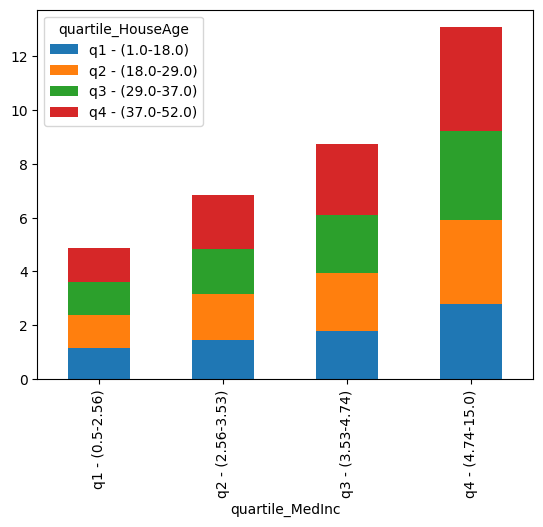

In [64]:
# plot barbplot - it can be used intern method and plot with matplotlib - v1
# y axis target
ct_mean.plot(kind='bar', stacked=True)

<Axes: xlabel='quartile_MedInc'>

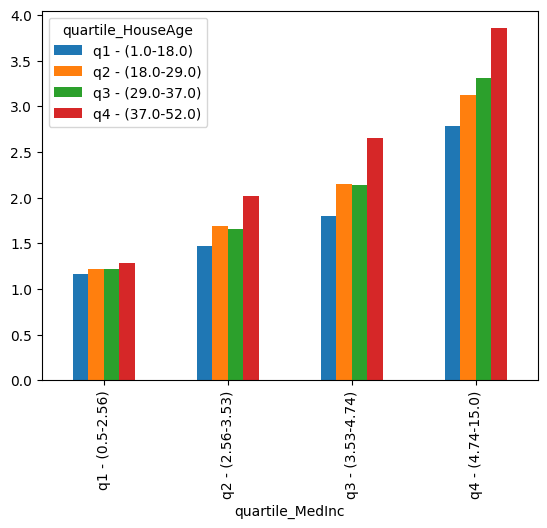

In [65]:
# plot barbplot - it can be used intern method and plot with matplotlib - v2 - without stack
# y axis target
ct_mean.plot(kind='bar')

#### plot with plotly

In [75]:
ct_mean

quartile_HouseAge,q1 - (1.0-18.0),q2 - (18.0-29.0),q3 - (29.0-37.0),q4 - (37.0-52.0)
quartile_MedInc,,,,
q1 - (0.5-2.56),1.159299,1.222798,1.217215,1.287692
q2 - (2.56-3.53),1.470188,1.693193,1.655947,2.019349
q3 - (3.53-4.74),1.796835,2.144851,2.138437,2.646894
q4 - (4.74-15.0),2.781631,3.123192,3.311238,3.853793


In [73]:
ct_mean.reset_index()

quartile_HouseAge,quartile_MedInc,q1 - (1.0-18.0),q2 - (18.0-29.0),q3 - (29.0-37.0),q4 - (37.0-52.0)
0,q1 - (0.5-2.56),1.159299,1.222798,1.217215,1.287692
1,q2 - (2.56-3.53),1.470188,1.693193,1.655947,2.019349
2,q3 - (3.53-4.74),1.796835,2.144851,2.138437,2.646894
3,q4 - (4.74-15.0),2.781631,3.123192,3.311238,3.853793


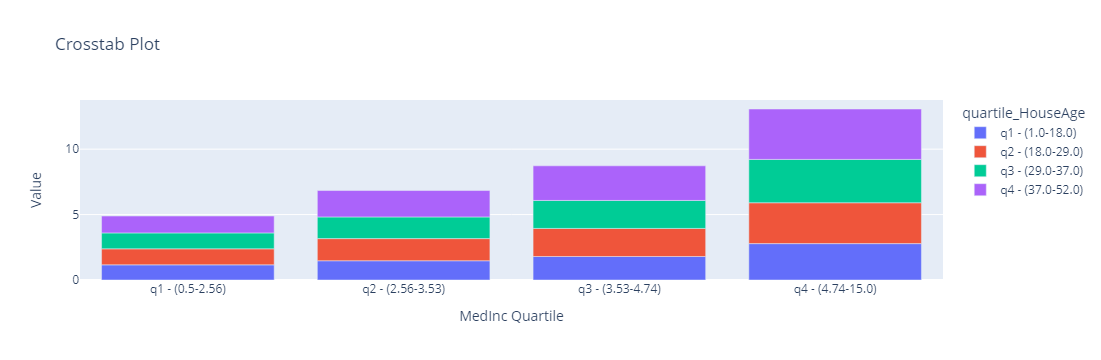

In [71]:
### plot tabla cruzada (cross tab) with plotly - stack
df = ct_mean.reset_index()

# Convierte la tabla a un formato adecuado para Plotly Express
df_plotly = pd.melt(df, id_vars='quartile_MedInc', var_name='quartile_HouseAge', value_name='value')

# Crea un gráfico interactivo con Plotly Express
fig = px.bar(df_plotly, x='quartile_MedInc', y='value', color='quartile_HouseAge',
             labels={'quartile_MedInc': 'MedInc Quartile', 'value': 'Value'}, title='Crosstab Plot')

# Muestra el gráfico
fig.show()

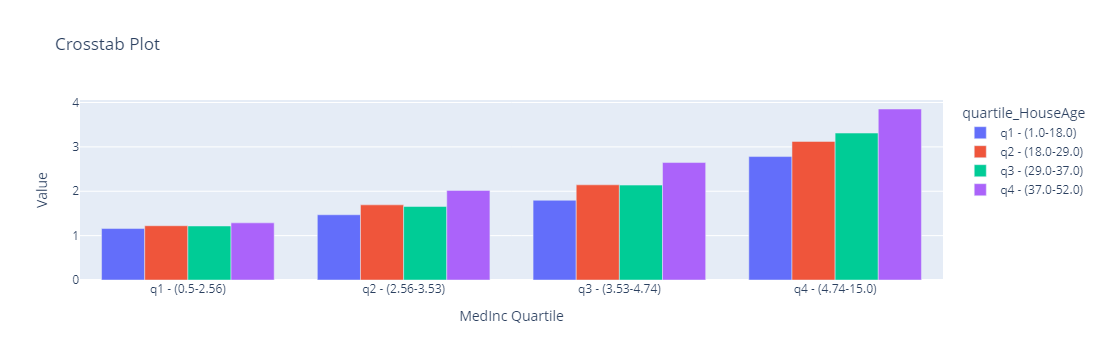

In [76]:
# stack NO

df = ct_mean.reset_index()

# Convierte la tabla a un formato adecuado para Plotly Express
df_plotly = pd.melt(df, id_vars='quartile_MedInc', var_name='quartile_HouseAge', value_name='value')

# Crea un gráfico interactivo con Plotly Express sin apilar las barras
fig = px.bar(df_plotly, x='quartile_MedInc', y='value', color='quartile_HouseAge',
             labels={'quartile_MedInc': 'MedInc Quartile', 'value': 'Value'}, title='Crosstab Plot',
             barmode='group')  # Especifica que no quieres barras apiladas

# Muestra el gráfico
fig.show()

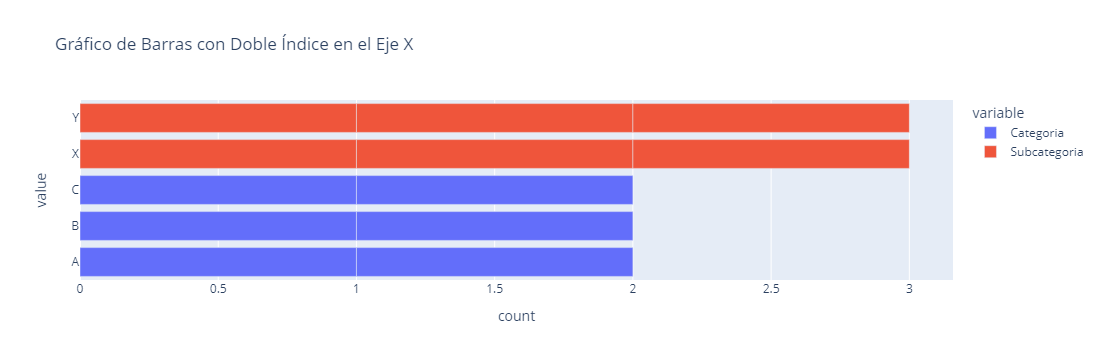

In [77]:
#### EXAMPLE DOBLE FEATURE IN X-AXIS

data = {
    'Categoria': ['A', 'A', 'B', 'B', 'C', 'C'],
    'Subcategoria': ['X', 'Y', 'X', 'Y', 'X', 'Y'],
    'Valor': [10, 15, 8, 12, 5, 9]
}

df = pd.DataFrame(data)

# Crear el gráfico de barras con doble índice en el eje x
fig = px.bar(df, x=['Categoria', 'Subcategoria'], y='Valor', title='Gráfico de Barras con Doble Índice en el Eje X')

# Mostrar el gráfico
fig.show()